In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('salary.csv')

#Check how many responders are in the dataframe and if the df has any null values

df.info()
df.isnull().sum().sum()
null_value_info = df[df['salary'].isnull()]
print(null_value_info)

display(df)

#514 responders
#One null value
#Null value on index 208 in the salary column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB
     salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
208     NaN        0           21         10    0.93       1          0   

     position  male  Field  yearsabs  
208         3     1      4         1  


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


In [2]:
#Lowest and Highest Salary in the Group

salary = df['salary']

highest_salary =salary.max()
print(highest_salary)

lowest_salary = salary.min()
print(lowest_salary)

96156.0
29000.0


In [3]:
#Mean salary and mean standard error

salary_mean = salary.mean()

print(salary_mean)

std_mean_er = stats.sem(salary, nan_policy='omit')

print(std_mean_er)

50863.22009783626
560.0622753925232


In [4]:
#standard deviation for years worked

years_worked = df['yearsworked']

years_worked_std = years_worked.std()

print(years_worked_std)


9.444695144169813


In [5]:
#median salary for the sample

salary_med = salary.median()

print(salary_med)

50096.0


In [6]:
#salary interquartile range

salary_iqr = stats.iqr(salary, nan_policy='omit')

print(salary_iqr)

20345.0


1    386
0    128
Name: male, dtype: int64


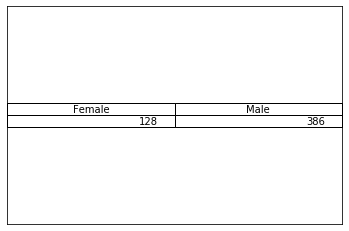

In [22]:
#Number of men and number of women in tyhe sample

print(df['male'].value_counts())

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from Ed Smith answer
clust_data = [df['male'].value_counts()]
collabel=("Female", "Male")
ax.table(cellText=clust_data,colLabels=collabel,loc='center')

In [34]:
#Executive men vs women

exec_series = df['position'] == 3

position_df = df[exec_series]

position_df['male'].value_counts()

#There are 192 males and 19 female executives

1    192
0     19
Name: male, dtype: int64

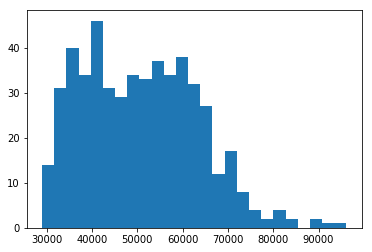

In [37]:
#salary histogram

plt.hist(salary, 25)
plt.show()